In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.signal as signal
from IPython.display import Audio

In [8]:
# load the file
matfile = loadmat('data/glassDance.mat')
glassclip = matfile['glassclip']
srate = matfile['srate'][0][0]

Audio(np.array(glassclip[:, 1]), rate=srate)

In [3]:
srate

44100

In [12]:
Audio(np.array(glassclip[:, 0]), rate=srate / 2)

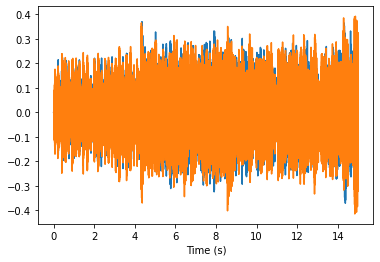

In [13]:
pnts = len(glassclip)
timevec = np.arange(0, pnts) / srate

# draw time-domain signals
plt.plot(timevec, glassclip)
plt.xlabel('Time (s)')
plt.show()

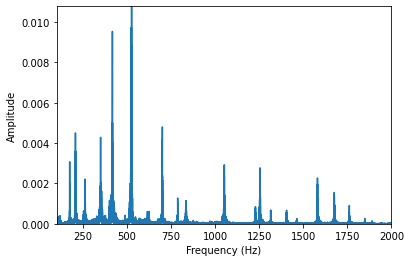

In [16]:
# static power spectrium and pick a frequency range
hz = np.linspace(0, srate / 2, int(np.floor(len(glassclip) / 2) + 1))
powr = abs(np.fft.fft(glassclip[:, 0]) / pnts)

plt.plot(hz, powr[:len(hz)])
plt.xlim([100, 2000])
plt.ylim([0, np.max(powr)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [40]:
# pick frequencies to filter
frange = [250, 350]

# design an FIR1 filter 
fkern = signal.firwin(2001, frange, nyq=srate / 2, pass_zero=False)

# apply filter to signal
filtglass = np.zeros(np.shape(glassclip))
filtglass[:, 0] = signal.filtfilt(fkern, 1, glassclip[:, 0])
filtglass[:, 1] = signal.filtfilt(fkern, 1, glassclip[:, 1])


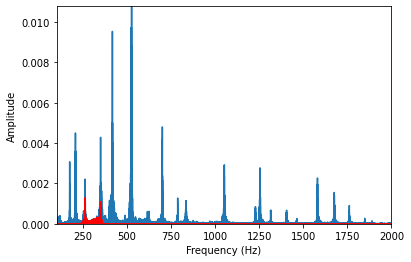

In [41]:
powerF = abs(np.fft.fft(filtglass[:, 0]) / pnts)

plt.plot(hz, powr[:len(hz)])
plt.plot(hz, powerF[:len(hz)], 'r')
plt.xlim([100, 2000])
plt.ylim([0, np.max(powr)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

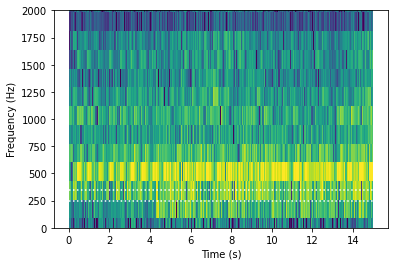

In [42]:
# plot time-frequency response 
frex, time, tf = signal.spectrogram(glassclip[:, 0], window=('tukey', .25), fs=srate, noverlap=100)

plt.plot([timevec[0], timevec[-1]], [frange[0], frange[0]], 'w:')
plt.plot([timevec[0], timevec[-1]], [frange[1], frange[1]], 'w:')
plt.pcolormesh(time, frex, np.log(tf), vmin=-20, vmax=-10)
plt.ylim([0, 2000])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [43]:
## Play the filtered signal!
Audio(np.array(filtglass[:,0]), rate=srate)